<a href="https://colab.research.google.com/github/AllamElsheikh/assiments-for-YBI/blob/main/Wine_Quality_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The wine quality prediction
the data from url('https://github.com/YBIFoundation/Dataset/blob/main/WhiteWineQuality.csv")


## Import the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import the data

In [ ]:
df = pd.read_csv('WhiteWineQuality.csv' , sep = ';');


## describing the data

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## data filtering

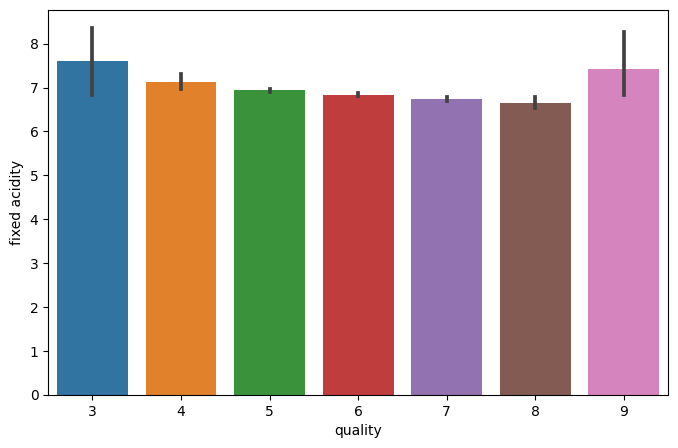

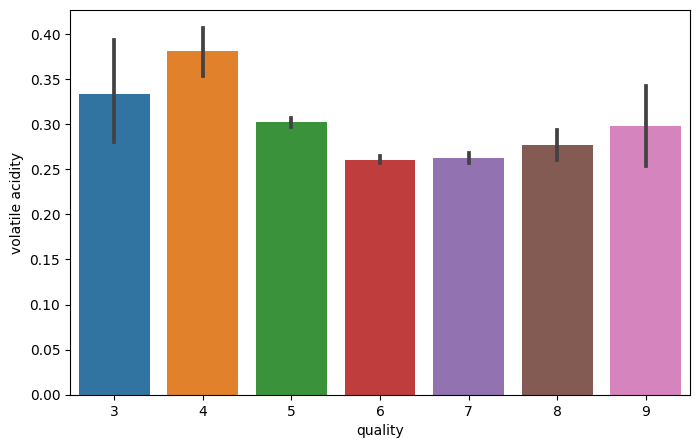

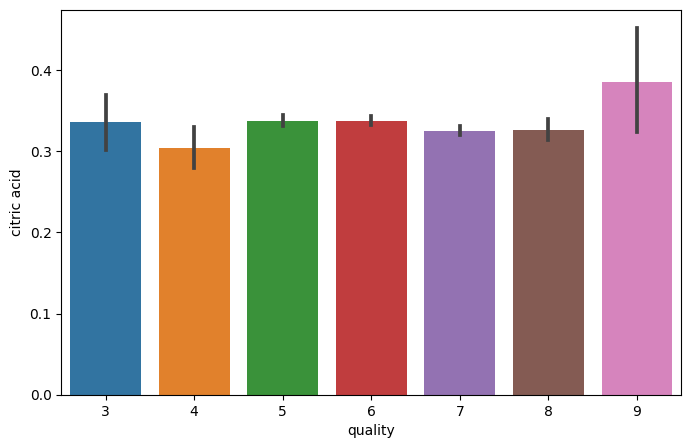

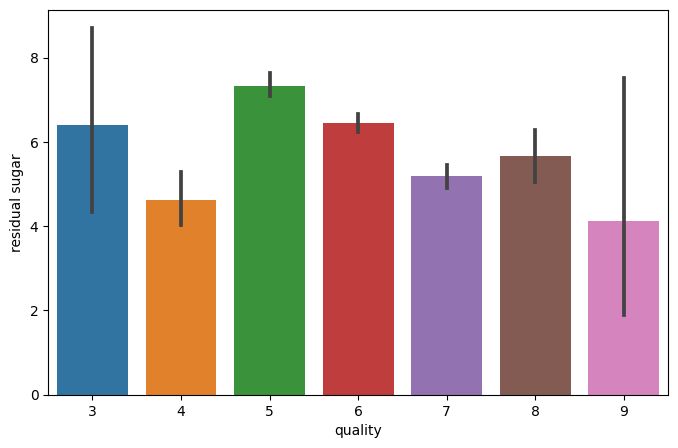

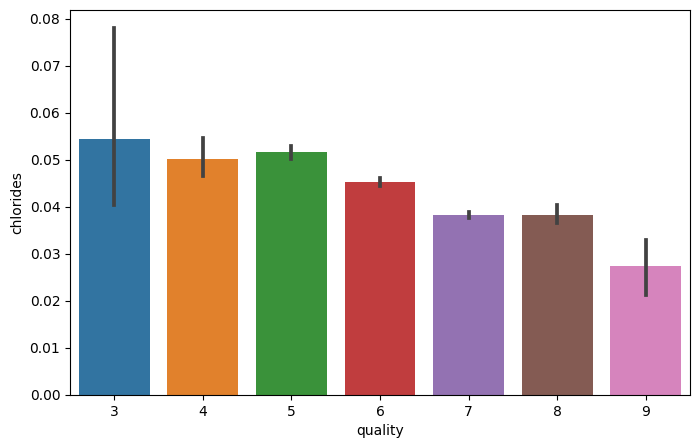

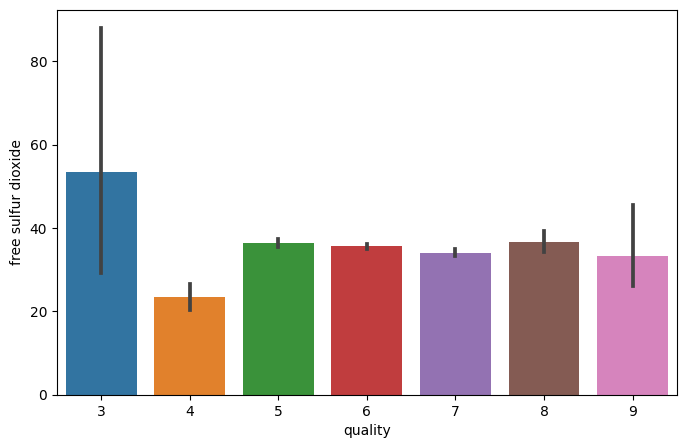

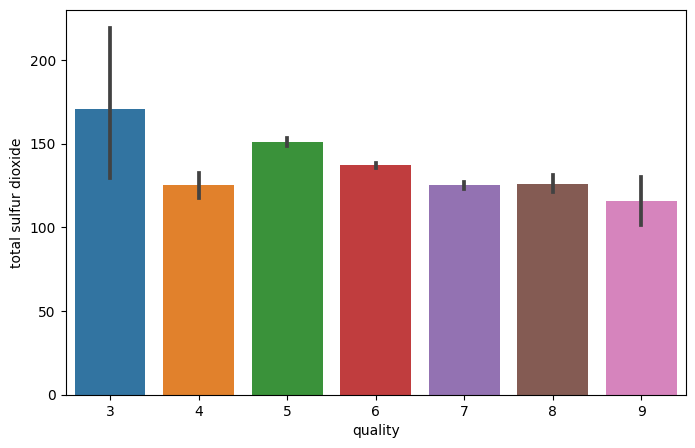

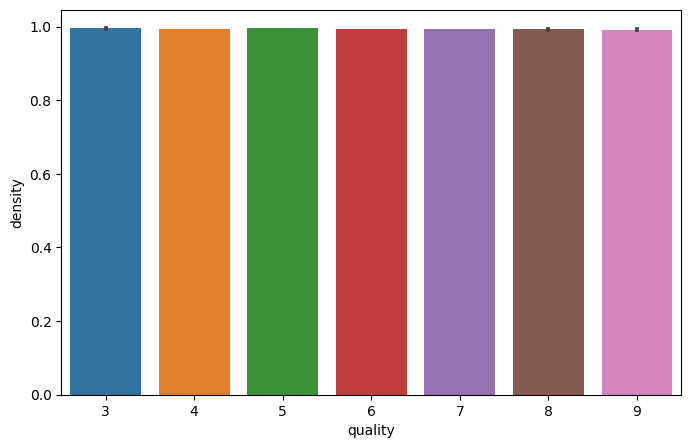

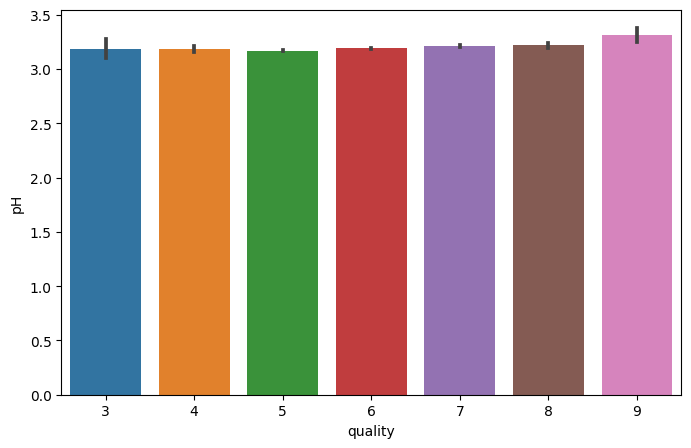

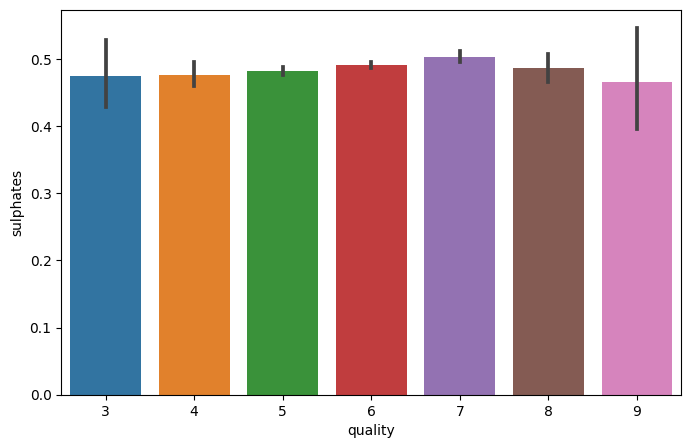

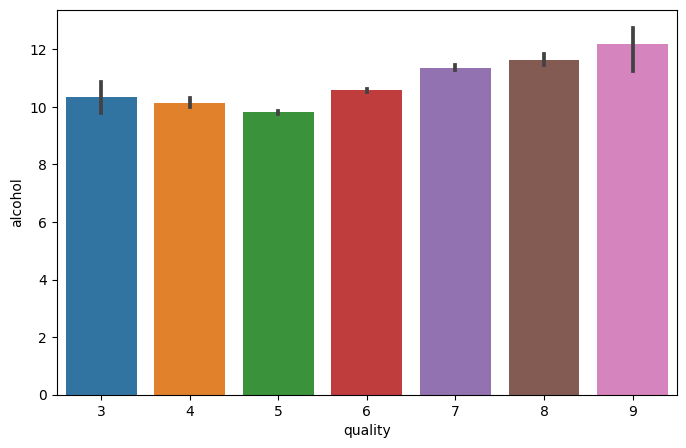

In [ ]:
for i in df.columns.drop('quality' ):
  fig = plt.figure(figsize= (8,5))
  sns.barplot(x = 'quality' ,y= i , data = df )


In [ ]:
df2 = df.drop(['pH' ,'residual sugar' , 'density'] ,axis = 1)
df2.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,0.45,8.8,6
1,6.3,0.30,0.34,0.049,14.0,132.0,0.49,9.5,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.44,10.1,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.40,9.9,6
4,7.2,0.23,0.32,0.058,47.0,186.0,0.40,9.9,6


## splitng the data into target and features

In [ ]:
x= df2.iloc[: ,:-1]
y = df2.iloc[: , -1]
print(x.shape)
print(y.shape)

(4898, 8)
(4898,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train , y_test = train_test_split(x,y ,test_size=.3 ,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3428, 8)
(1470, 8)
(3428,)
(1470,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelr = RandomForestClassifier()
model.fit(x_train ,y_train)
print(model.score(x_train ,y_train))
print(model.score(x_test ,y_test))


0.44632438739789965
0.45918367346938777


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        40
           5       0.47      0.11      0.18       426
           6       0.46      0.94      0.62       668
           7       0.00      0.00      0.00       280
           8       0.00      0.00      0.00        49

    accuracy                           0.46      1470
   macro avg       0.15      0.18      0.13      1470
weighted avg       0.34      0.46      0.33      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## improve the model

In [ ]:
bins = ( 2 ,6.5 ,8 )
names = ['bad' ,'good']
df2['quality'] = pd.cut(df2['quality'] , bins  =bins , labels = names)
df2.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,0.45,8.8,bad
1,6.3,0.30,0.34,0.049,14.0,132.0,0.49,9.5,bad
2,8.1,0.28,0.40,0.050,30.0,97.0,0.44,10.1,bad
3,7.2,0.23,0.32,0.058,47.0,186.0,0.40,9.9,bad
4,7.2,0.23,0.32,0.058,47.0,186.0,0.40,9.9,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df2['quality'] = le.fit_transform(df2['quality'])
df2.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,0.45,8.8,0
1,6.3,0.30,0.34,0.049,14.0,132.0,0.49,9.5,0
2,8.1,0.28,0.40,0.050,30.0,97.0,0.44,10.1,0
3,7.2,0.23,0.32,0.058,47.0,186.0,0.40,9.9,0
4,7.2,0.23,0.32,0.058,47.0,186.0,0.40,9.9,0


In [ ]:
df2['quality'].value_counts()

0    3838
1    1055
2       5
Name: quality, dtype: int64

In [ ]:
x= df2.iloc[: ,:-1]
y = df2.iloc[: , -1]
x_train ,x_test ,y_train , y_test = train_test_split(x,y ,test_size=.3 ,random_state=42)


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train , y_train)
print('f the train_score' ,model.score(x_train ,y_train))
print('f the test score',model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print('f classifcation report' , classification_report(y_test , y_pred))
print('f confusion metrix ' , confusion_matrix(y_test ,y_pred))

f the train_score 0.7867561260210035
f the test score 0.7761904761904762
f classifcation report               precision    recall  f1-score   support

           0       0.78      1.00      0.87      1141
           1       0.00      0.00      0.00       329

    accuracy                           0.78      1470
   macro avg       0.39      0.50      0.44      1470
weighted avg       0.60      0.78      0.68      1470

f confusion metrix  [[1141    0]
 [ 329    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import  cross_val_score

rfc_eval = cross_val_score(estimator = modelr, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


0.8611409476071129